In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [35]:
df=pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [36]:
df.shape

(30, 2)

In [37]:
x=df.iloc[:,0]
y=df.iloc[:,1]

# The equation of simple linear regression is
***y=f(x)=wx+b***, where

*   y is prediction done on x
*   w is the weight parameter
*   b is the bias

In [1]:
def func(x,w,b):
  return w*x+b

# The Cost Function
J(w,b) = (1/(2*m)) *(m∑(x=1)(f(w,x,b)-y')^2)

In [2]:
def cost_func(x,y,w,b):
  m=len(x)
  predicted=0
  for i in range(m):
    predicted+=(func(x[i],w,b)-y[i])**2
  return predicted//(2*m)

# Gradient Descent

In [50]:
def compute_gradient(x,y,w,b):
  m=len(x)
  w_grad=0
  b_grad=0
  for i in range(m):
    err=func(x[i],w,b)-y[i]
    w_grad+=err*x[i]
    b_grad+=err
  return w_grad/m,b_grad/m

In [51]:
def gradient_descent(x,y,w,b,iters,alpha):
  for i in range(iters):
    w_grad,b_grad=compute_gradient(x,y,w,b)
    w-=alpha*w_grad
    b-=alpha*b_grad
  return w,b

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=x_train.tolist()
y_train=y_train.tolist()
x_train

[10.3,
 8.7,
 4.0,
 1.1,
 2.2,
 5.1,
 2.9,
 4.1,
 4.0,
 7.9,
 1.3,
 1.5,
 9.0,
 2.0,
 7.1,
 9.5,
 5.9,
 10.5,
 6.8,
 3.2,
 3.9,
 4.5,
 6.0,
 3.0]

# Computing the values of w,b

In [63]:
w,b=gradient_descent(x_train,y_train,1,1,1000,0.01)
print("coefficient is-->",w)
print("Intercept is-->",b)

coefficient is--> 9768.468561692822
Intercept is--> 22997.504712813927


In [64]:
y_pred=[]
for i in range(len(x_train)):
  y_pred.append(func(x_train[i],w,b))

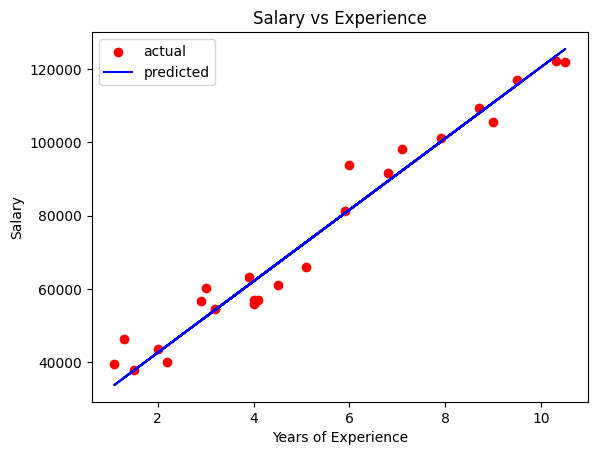

In [65]:
plt.scatter(x_train,y_train,color='red',label='actual')
plt.plot(x_train,y_pred,color='blue',label='predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.legend()
plt.show()

# Predicting the Test Data and calcuation R2 Score

In [66]:
from sklearn.metrics import r2_score

x_test = x_test.tolist()
y_pred_test = []
for i in range(len(x_test)):
  y_pred_test.append(func(x_test[i],w,b))

r2 = r2_score(y_test, y_pred_test)
print("R-squared score:",r2)

R-squared score: 0.8964821931039043


# Direct Method

In [70]:
from sklearn.linear_model import LinearRegression

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=x_train.values.reshape(-1,1)

In [79]:
x_train.shape,y_train.shape

((24, 1), (24,))

In [80]:
regr=LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [83]:
regr.coef_,regr.intercept_

(array([9423.81532303]), 25321.583011776813)

In [86]:
a=regr.predict(x_test.values.reshape(-1,1))

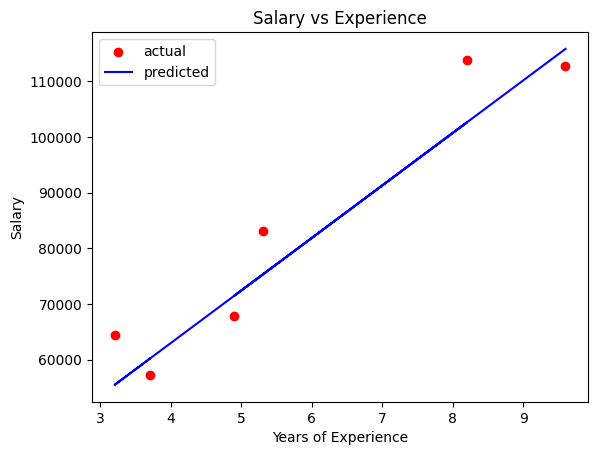

In [89]:
plt.scatter(x_test,y_test,color='red',label='actual')
plt.plot(x_test,a,color='blue',label='predicted')
plt.legend()
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [90]:
print(r2_score(y_test,a))

0.9024461774180497


In [93]:
years=15
salary=func(years,w,b)
print(years,'years--->',salary,'/-')

15 years---> 169524.53313820623 /-
